### HA5 - Superdense coding 
##### Araghi Agostino S5146307, Fazio Valentina S5175314, Giampietro Andrea S5208458, Ottonello Thomas S5224298, Rosselli Sara S5204959

In [174]:
import cirq 
import matplotlib.pyplot as plt

Definiamo una funzione per generare lo stato di Bell 1/sqrt(2) * ( |00> + |11> ):
 
questo sarà lo stato entangled condiviso tra Alice e Bob

In [175]:
def Bell():
  circuito = cirq.Circuit()
  a, b = cirq.LineQubit.range(2)
  circuito.append(cirq.H(a)) 
  circuito.append(cirq.CNOT(a,b)) 
  return a, b, circuito

Definiamo una funzione per stampare i risultati della simulazione e il circuito 

In [176]:
def stampaCircuito(circuito, simulatore):
  print('Circuito:')
  risultati= simulatore.simulate(circuito)
  print(risultati)
  print('\n\n')
  print(circuito)
  print('\n')

Definiamo una funzione per effettuare una misura su un qubit e stampare un istogramma con il numero di volte in cui abbiamo ottenuto il risultato atteso

In [177]:
def misura(simulatore, a, b, circuito):
  n = 1000
  circuito.append(cirq.measure(a, b, key='risultato'))
  campioni = simulatore.run(circuito, repetitions=n) # verifica per n ripetizioni il risultato
  conteggi = campioni.histogram(key='risultato')
  cirq.plot_state_histogram(conteggi, plt.subplot())
  plt.show()

Inizializziamo il simulatore

In [178]:
s = cirq.Simulator()

Creiamo lo stato di Bell

In [179]:
a, b, circuito = Bell()

Creiamo un dizionario in modo da applicare le operazioni necessarie per ogni possibile messaggio inviato da Alice

In [180]:
messaggio = {
        "00": [],
        "01": [cirq.X(a)],
        "10": [cirq.Z(a)],
        "11": [cirq.Z(a), cirq.X(a)]}

Alice sceglie il messaggio da inviare, la parte seguente cambia in base al messaggio scelto

In [181]:
m = "00" # modificare il messaggio a piacere
print("Alice manda = ", m) 

Alice manda =  11


Alice codifica il messaggio con le operazioni da effettuare

In [182]:
circuito.append(messaggio[m])

Stampiamo i risultati e il circuito

In [183]:
stampaCircuito(circuito, s)

Circuito:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: -0.707|01⟩ + 0.707|10⟩

phase:
output vector: |⟩



0: ───H───@───Z───X───
          │
1: ───────X───────────




Bob riceve lo stato entangled e cerca di ottenere la stringa originale

Circuito:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: -1|11⟩

phase:
output vector: |⟩



0: ───H───@───Z───X───@───H───
          │           │
1: ───────X───────────X───────


Counter({3: 1000})


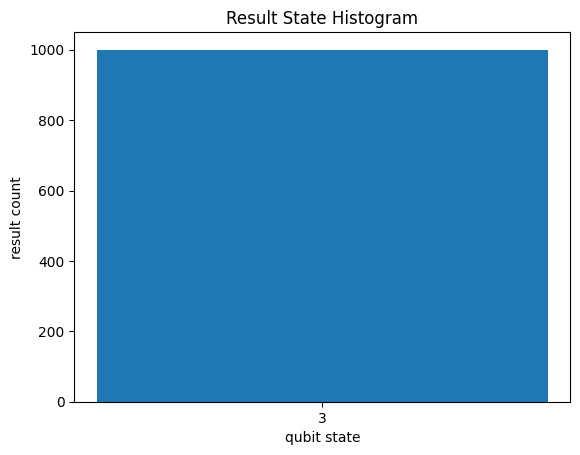

In [184]:
circuito.append(cirq.CNOT(a,b))
circuito.append(cirq.H(a))
stampaCircuito(circuito, s) 
misura(s, a, b, circuito) 
